# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Mount drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# User Define Funtion

In [37]:
def score(x,y):
  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
  ac = accuracy_score(x,y)
  pr = precision_score(x,y)
  re = recall_score(x,y)
  f1 = f1_score(x,y)

  print("Accuracy         : ",ac)
  print("Precision        : ",pr)
  print("Recall           : ",re)
  print("F1_Score         : ",f1)



# Load dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Tutorial/diabetes.csv')

In [4]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,Yes
1,1,85.0,66,29,0,26.6,0.351,31,No
2,8,183.0,64,0,0,23.3,0.672,32,Yes
3,1,89.0,66,23,94,28.1,0.167,21,No
4,0,137.0,40,35,168,NaN,2.288,33,Yes


In [5]:
col_name=[]
for col in dataset.columns:
  col_name.append(col)


In [6]:
print(col_name)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [7]:
dataset.shape

(768, 9)

In [8]:
dataset['Outcome'] = dataset['Outcome'].map({'Yes':0,'No':1})

In [9]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,0
1,1,85.0,66,29,0,26.6,0.351,31,1
2,8,183.0,64,0,0,23.3,0.672,32,0
3,1,89.0,66,23,94,28.1,0.167,21,1
4,0,137.0,40,35,168,NaN,2.288,33,0


In [10]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,760.0,120.868421,32.013190,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,757.0,31.950330,7.898177,0.000,27.30000,32.0000,36.50000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.651042,0.476951,0.000,0.00000,1.0000,1.00000,1.00


## Missing Value info

In [11]:
print(dataset.isnull().sum())

Pregnancies                  0
Glucose                      8
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64


In [13]:
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_df = pd.DataFrame({'column_name': dataset.columns,
                                 'percent_missing': percent_missing})

In [14]:
print(missing_value_df)

                                       column_name  percent_missing
Pregnancies                            Pregnancies         0.000000
Glucose                                    Glucose         1.041667
BloodPressure                        BloodPressure         0.000000
SkinThickness                        SkinThickness         0.000000
Insulin                                    Insulin         0.000000
BMI                                            BMI         1.432292
DiabetesPedigreeFunction  DiabetesPedigreeFunction         0.000000
Age                                            Age         0.000000
Outcome                                    Outcome         0.000000


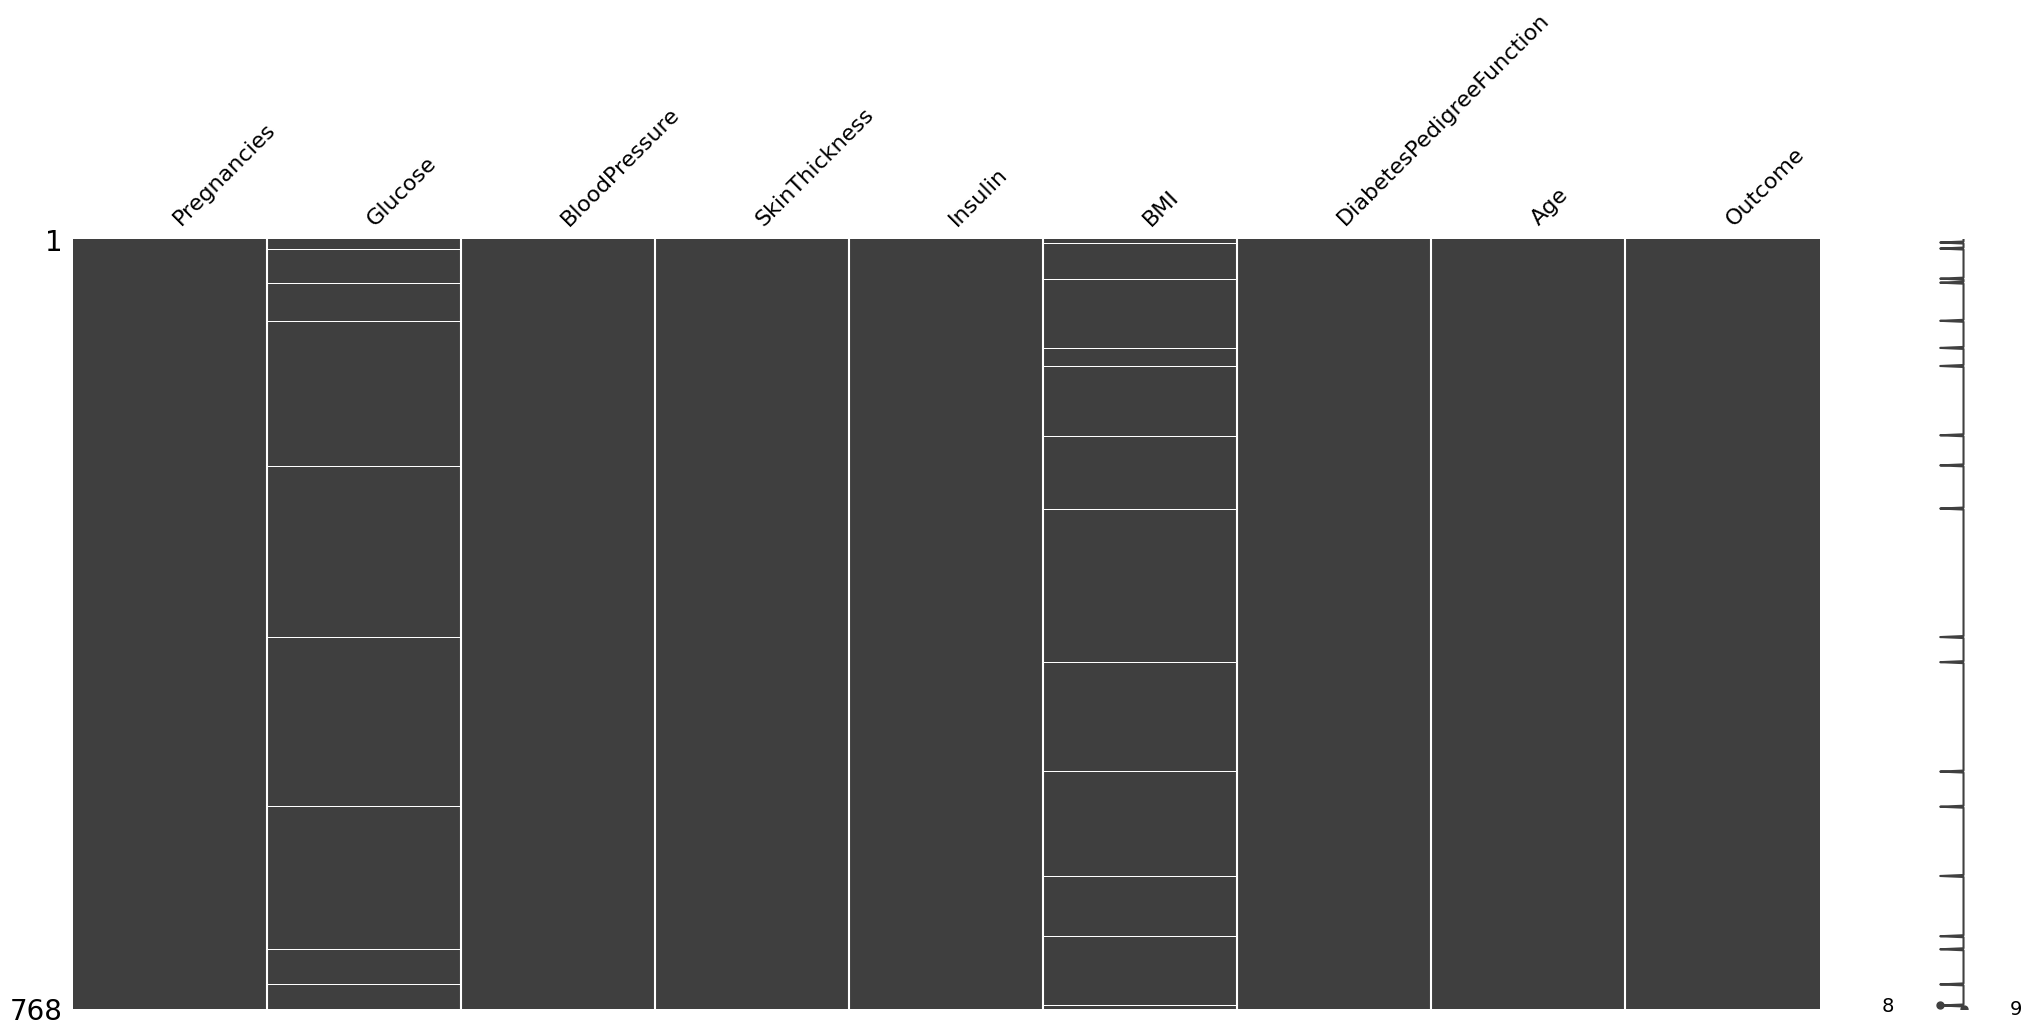

In [16]:
#%% Plot Missing Values Location
import missingno as msno
%matplotlib inline

msno.matrix(dataset)
plt.show()

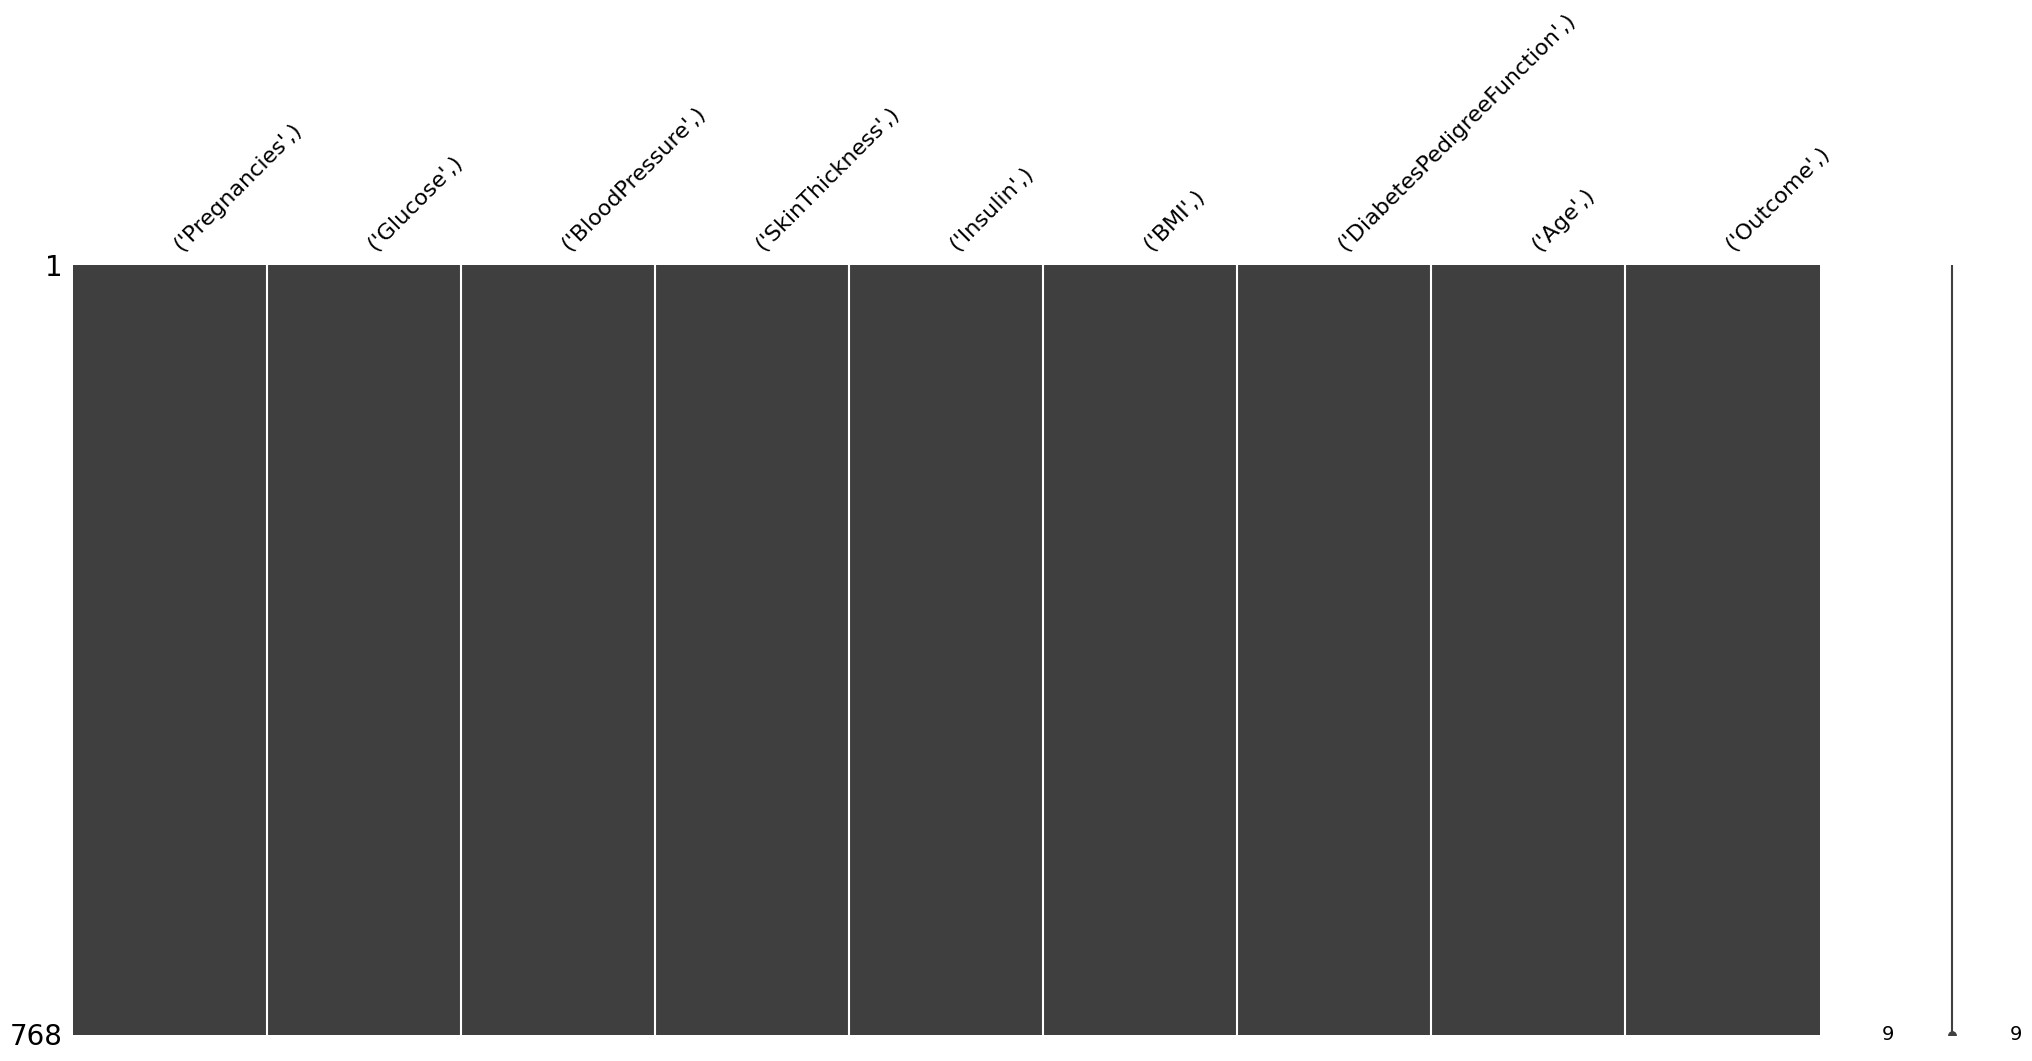

In [17]:
#%% KNN Imputer

import numpy as np
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

new_data = imputer.fit_transform(dataset)
df = pd.DataFrame(new_data, columns=[col_name])

msno.matrix(df)
plt.show()

## Create X and Y

In [19]:
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [20]:
print(X)

    Pregnancies Glucose BloodPressure SkinThickness Insulin    BMI  \
0           6.0   148.0          72.0          35.0     0.0  33.60   
1           1.0    85.0          66.0          29.0     0.0  26.60   
2           8.0   183.0          64.0           0.0     0.0  23.30   
3           1.0    89.0          66.0          23.0    94.0  28.10   
4           0.0   137.0          40.0          35.0   168.0  34.66   
..          ...     ...           ...           ...     ...    ...   
763        10.0   101.0          76.0          48.0   180.0  32.90   
764         2.0   122.0          70.0          27.0     0.0  31.00   
765         5.0   121.0          72.0          23.0   112.0  26.20   
766         1.0   126.0          60.0           0.0     0.0  30.10   
767         1.0    93.0          70.0          31.0     0.0  30.40   

    DiabetesPedigreeFunction   Age  
0                      0.627  50.0  
1                      0.351  31.0  
2                      0.672  32.0  
3          

In [21]:
print(y)

    Outcome
0       0.0
1       1.0
2       0.0
3       1.0
4       0.0
..      ...
763     1.0
764     1.0
765     1.0
766     0.0
767     1.0

[768 rows x 1 columns]


## Class info

<Axes: xlabel='Outcome', ylabel='count'>

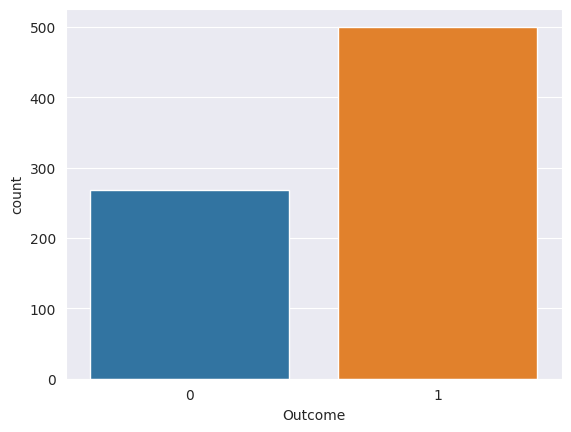

In [22]:
import seaborn as sn
sn.set_style('darkgrid')
sn.countplot(x='Outcome',data=dataset)

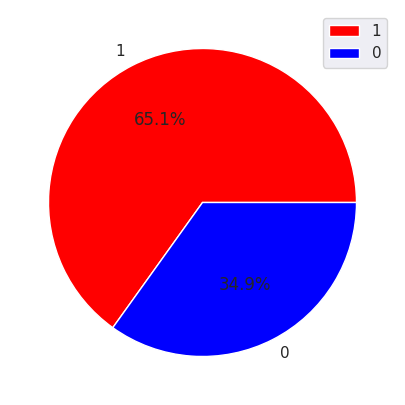

1    500
0    268
Name: Outcome, dtype: int64


In [23]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(font_scale=1)
plt.rcParams['figure.figsize']=10,5
plt.pie(dataset['Outcome'].value_counts(),autopct='%1.1f%%',colors=['red', 'blue'],
    labels=dataset['Outcome'].value_counts().index)
plt.legend()
plt.show()
print(dataset['Outcome'].value_counts())

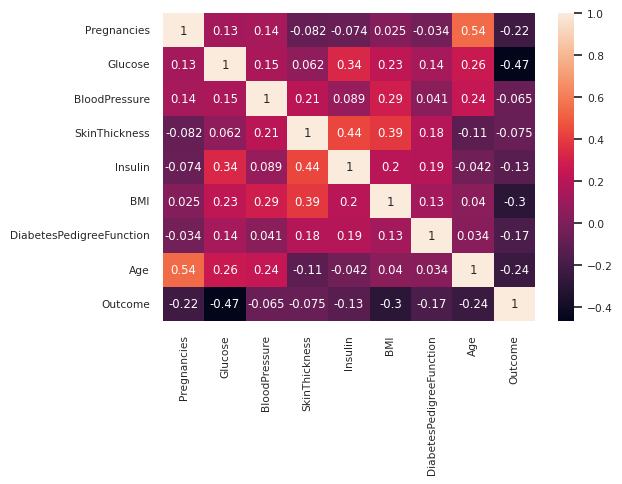

In [26]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.set(font_scale=0.7)
sn.set_style("darkgrid")
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(dataset.corr(),annot=True, ax=ax)
plt.show()

## Spliting the dataset into Training set and Test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Traian Model

In [29]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [30]:
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
y_pred = classifier_knn.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred)
print(cm_knn)

[[29 18]
 [14 93]]


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [35]:
ac = accuracy_score(y_test,y_pred)
print(ac)

0.7922077922077922


In [36]:
pr = precision_score(y_test,y_pred)
print(pr)

0.8378378378378378


In [38]:
score(y_test,y_pred)

Accuracy         :  0.7922077922077922
Precision        :  0.8378378378378378
Recall           :  0.8691588785046729
F1_Score         :  0.8532110091743118
